In [1]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import collections
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/jafetl/An-lise-sobre-acidentes-de-transito/main/datatran2021.csv" , encoding = "ISO-8859-1", sep = ';')
df = df.dropna()
pd.options.display.max_columns = None

In [3]:
longi = collections.UserDict(df['longitude'])
brlongi = []

for key, value in longi.items():
    value.replace(',', '.')
    brlongi.append(value.replace(',','.'))

    
df['longitude'] = brlongi


In [4]:
lati = collections.UserDict(df['latitude'])
brlati = []

for key, value in lati.items():
    value.replace(',', '.')
    brlati.append(value.replace(',','.'))

    
df['latitude'] = brlati


In [5]:
df['latitude'] = df['latitude'].astype(float)
df['longitude'] = df['longitude'].astype(float)

In [50]:
kmeans = KMeans(n_clusters=5)

In [51]:
input_data = df[['latitude', 'longitude']]

In [52]:
kmeans.fit(input_data)

KMeans(n_clusters=5)

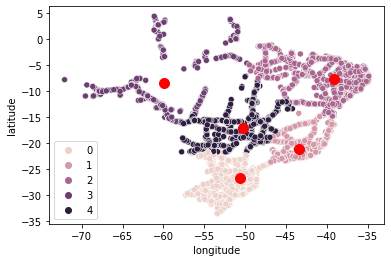

In [53]:
sns.scatterplot(data=input_data, x="longitude", y="latitude", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,0], s = 100, c = 'red', alpha = 1)

Podemos observar agrupamentos bem parecidos com as regiões do Brasil usando a latitude e longitude.

In [23]:
p = collections.UserDict(df['km'])
brr = []

for key, value in p.items():
    value.replace(',', '.')
    brr.append(value.replace(',','.'))

df['km'] = brr
df['km'] = df['km'].astype(float)

In [24]:
input_data2 = df[['br', 'km']]

In [47]:
kmeans2 = KMeans(n_clusters=9)

In [48]:
kmeans2.fit(input_data2)

KMeans(n_clusters=9)

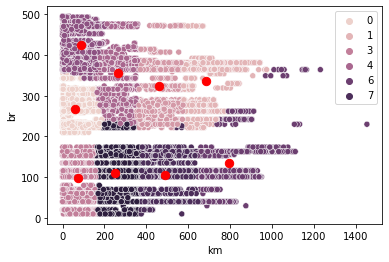

In [49]:
sns.scatterplot(data=input_data2, x="km", y="br", hue=kmeans2.labels_)
plt.scatter(kmeans2.cluster_centers_[:,1],kmeans2.cluster_centers_[:,0], s = 70, c = 'red')

Foi identificado um padrão onde existem uma concentração de acidentes nos primeiros quilômetros 
das rodovias diminuindo conforme vai se aproximando do final pode provar isso tirando a média dos 
quilômetros onde tem 29145 abaixo dos 700 da média e 1666 acima da média.

Uma nova pergunta foi descoberta: Por que existem mais acidentes nos últimos quilômetros das rodovias 